In [8]:
 
import pandas as pd

file_path = 'otog_data.csv'
data = pd.read_csv(file_path)

print("Original Data: \n")
print(data.head())

data_cleaned = data.drop(columns=['CID', 'TID'])

data_cleaned.fillna(0, inplace=True)

data_cleaned['Discount Amount (INR)'] = data_cleaned['Discount Amount (INR)'].astype(float)
data_cleaned['Gender'] = data_cleaned['Gender'].str.lower()
data_cleaned = data_cleaned[data_cleaned['Net Amount'] >= 0]
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]
data_cleaned.rename(columns={'Discount Amount (INR)': 'Discount_Amount (PHP)'}, inplace=True)

exchange_rate = 0.67
data_cleaned['Discount_Amount (PHP)'] = data_cleaned['Discount_Amount (PHP)'] * exchange_rate
data_cleaned['Gross Amount'] = data_cleaned['Gross Amount'] * exchange_rate
data_cleaned['Net Amount'] = data_cleaned['Net Amount'] * exchange_rate


print("\n---------------------------------------------------------------------------------")
print("\nCleaned Data: \n")
print(data_cleaned.head())

# discount amount by Keiru gwapo hihi

discount_amount = data_cleaned['Discount_Amount (PHP)']

meanz = discount_amount.mean()
medianz = discount_amount.median()
modez = discount_amount.mode()[0]

std_devz = discount_amount.std()
varz = discount_amount.var()

minz = discount_amount.min()
maxz = discount_amount.max()
rangez = maxz - minz

# percentilez my mego

percentile_discount_data = discount_amount.quantile([0.25, 0.5, 0.75])
print("\n---------------------------------------------------------------------------------")

print("\nDiscount Amount (PHP) Statistics:")
print("Mean: ", meanz)
print("Median: ", medianz)
print("Mode: ", modez)
print("Standard Deviation: ", std_devz)
print("Variance: ", varz)
print("Minimum: ", minz)
print("Maximum: ", maxz)
print("Range: ", rangez)
print("Percentiles:")
print(percentile_discount_data)


# gross amount by Keiru gwapo againz!

gross_amount = data_cleaned['Gross Amount']

mean_gross = gross_amount.mean()
median_gross = gross_amount.median()
mode_gross = gross_amount.mode()[0]

std_dev_gross = gross_amount.std()
var_gross = gross_amount.var()

min_gross = gross_amount.min()
max_gross = gross_amount.max()
range_gross = max_gross - min_gross

percentile_gross_data = gross_amount.quantile([0.25, 0.5, 0.75])

print("\n---------------------------------------------------------------------------------")
print("\nGross Amount Statistics:")
print("Mean: ", mean_gross)
print("Median: ", median_gross)
print("Mode: ", mode_gross)
print("Standard Deviation: ", std_dev_gross)
print("Variance: ", var_gross)
print("Minimum: ", min_gross)
print("Maximum: ", max_gross)
print("Range: ", range_gross)
print("Percentiles:")
print(percentile_gross_data)


Original Data: 

      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Cr

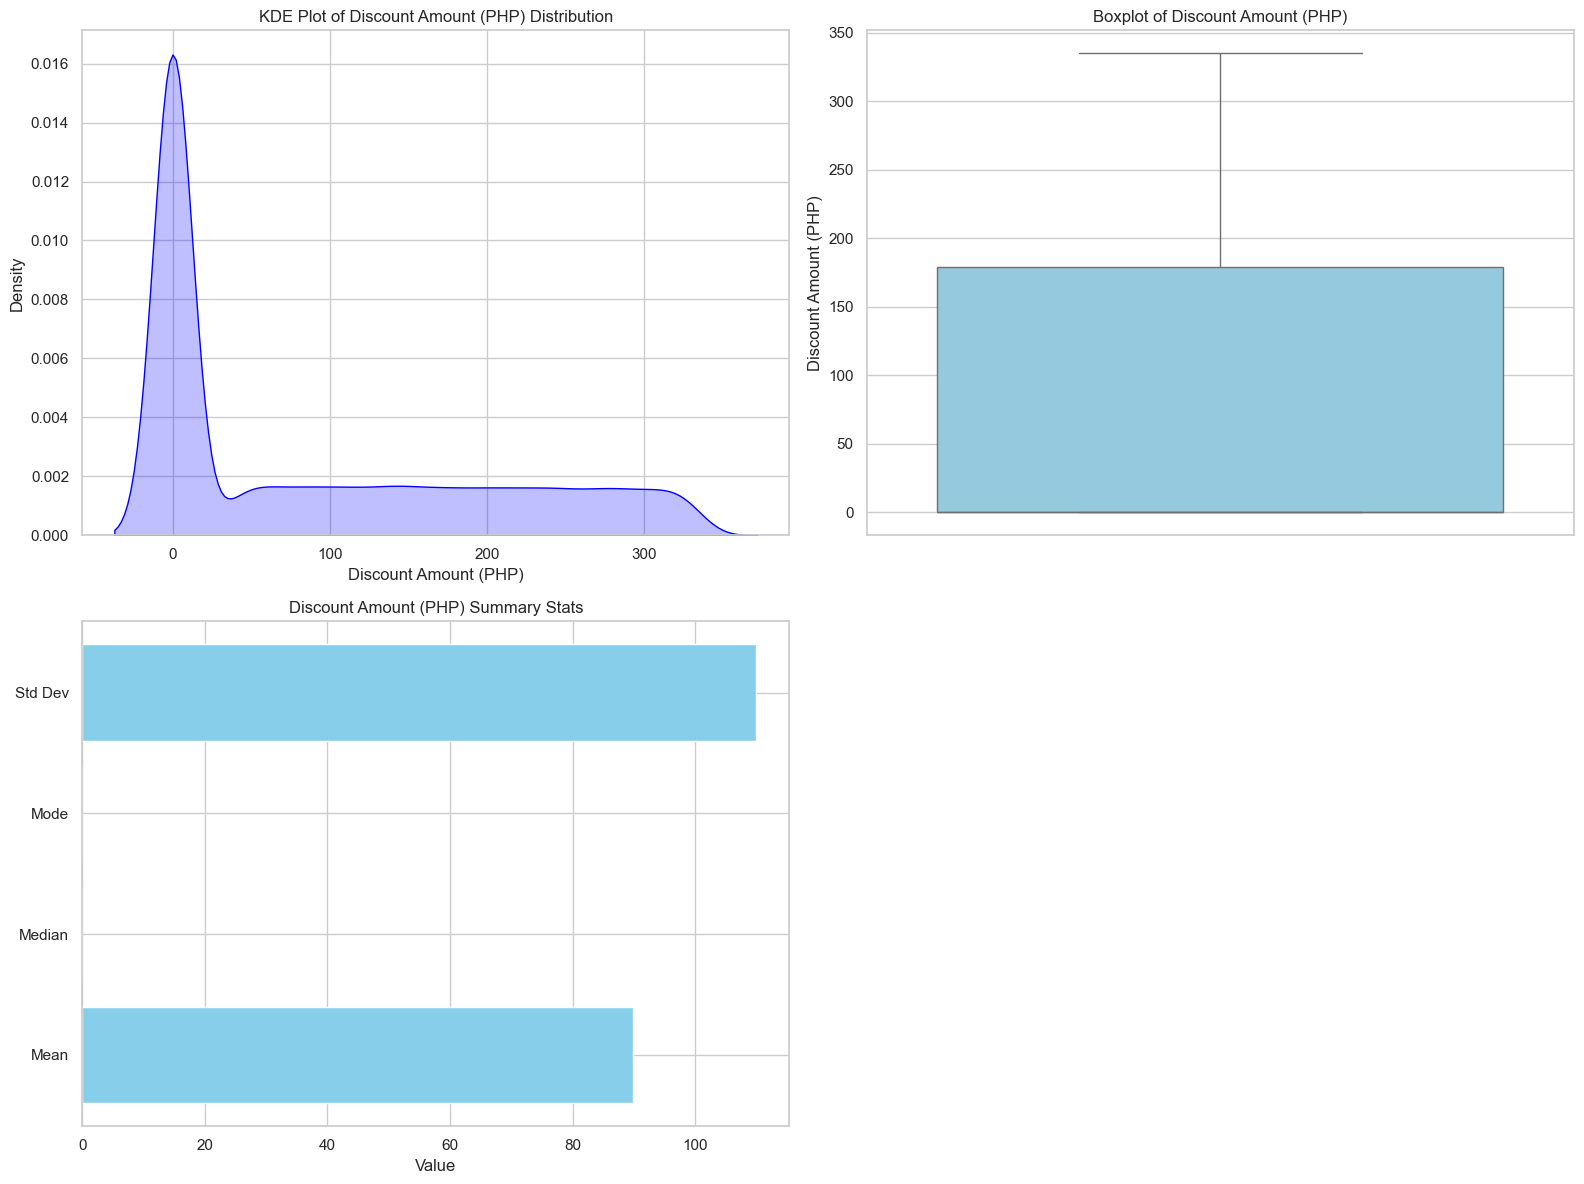

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(16, 12))

# 1. KDE Plot for Discount Amount Distribution
plt.subplot(2, 2, 1)
sns.kdeplot(data_cleaned['Discount_Amount (PHP)'], color='blue', fill=True)  # Updated fill=True
plt.title('KDE Plot of Discount Amount (PHP) Distribution')
plt.xlabel('Discount Amount (PHP)')
plt.ylabel('Density')

# 2. Box plot for Discount Amount (PHP)
plt.subplot(2, 2, 2)
sns.boxplot(y=data_cleaned['Discount_Amount (PHP)'], color='skyblue')
plt.title('Boxplot of Discount Amount (PHP)')
plt.ylabel('Discount Amount (PHP)')

# 3. Horizontal Bar Chart for Discount Amount (PHP) Summary Stats
discount_stats = [meanz, medianz, modez, std_devz]
stat_names = ['Mean', 'Median', 'Mode', 'Std Dev']

plt.subplot(2, 2, 3)
plt.barh(stat_names, discount_stats, color='skyblue')
plt.title('Discount Amount (PHP) Summary Stats')
plt.xlabel('Value')

# Adjust layout for better spacing
plt.tight_layout()

# Show all the Discount Amount (PHP) related graphs
plt.show()


C:\Users\keiru\AppData\Local\Temp\ipykernel_44624\2227112741.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_cleaned['Gross Amount'], color='green', shade=True)


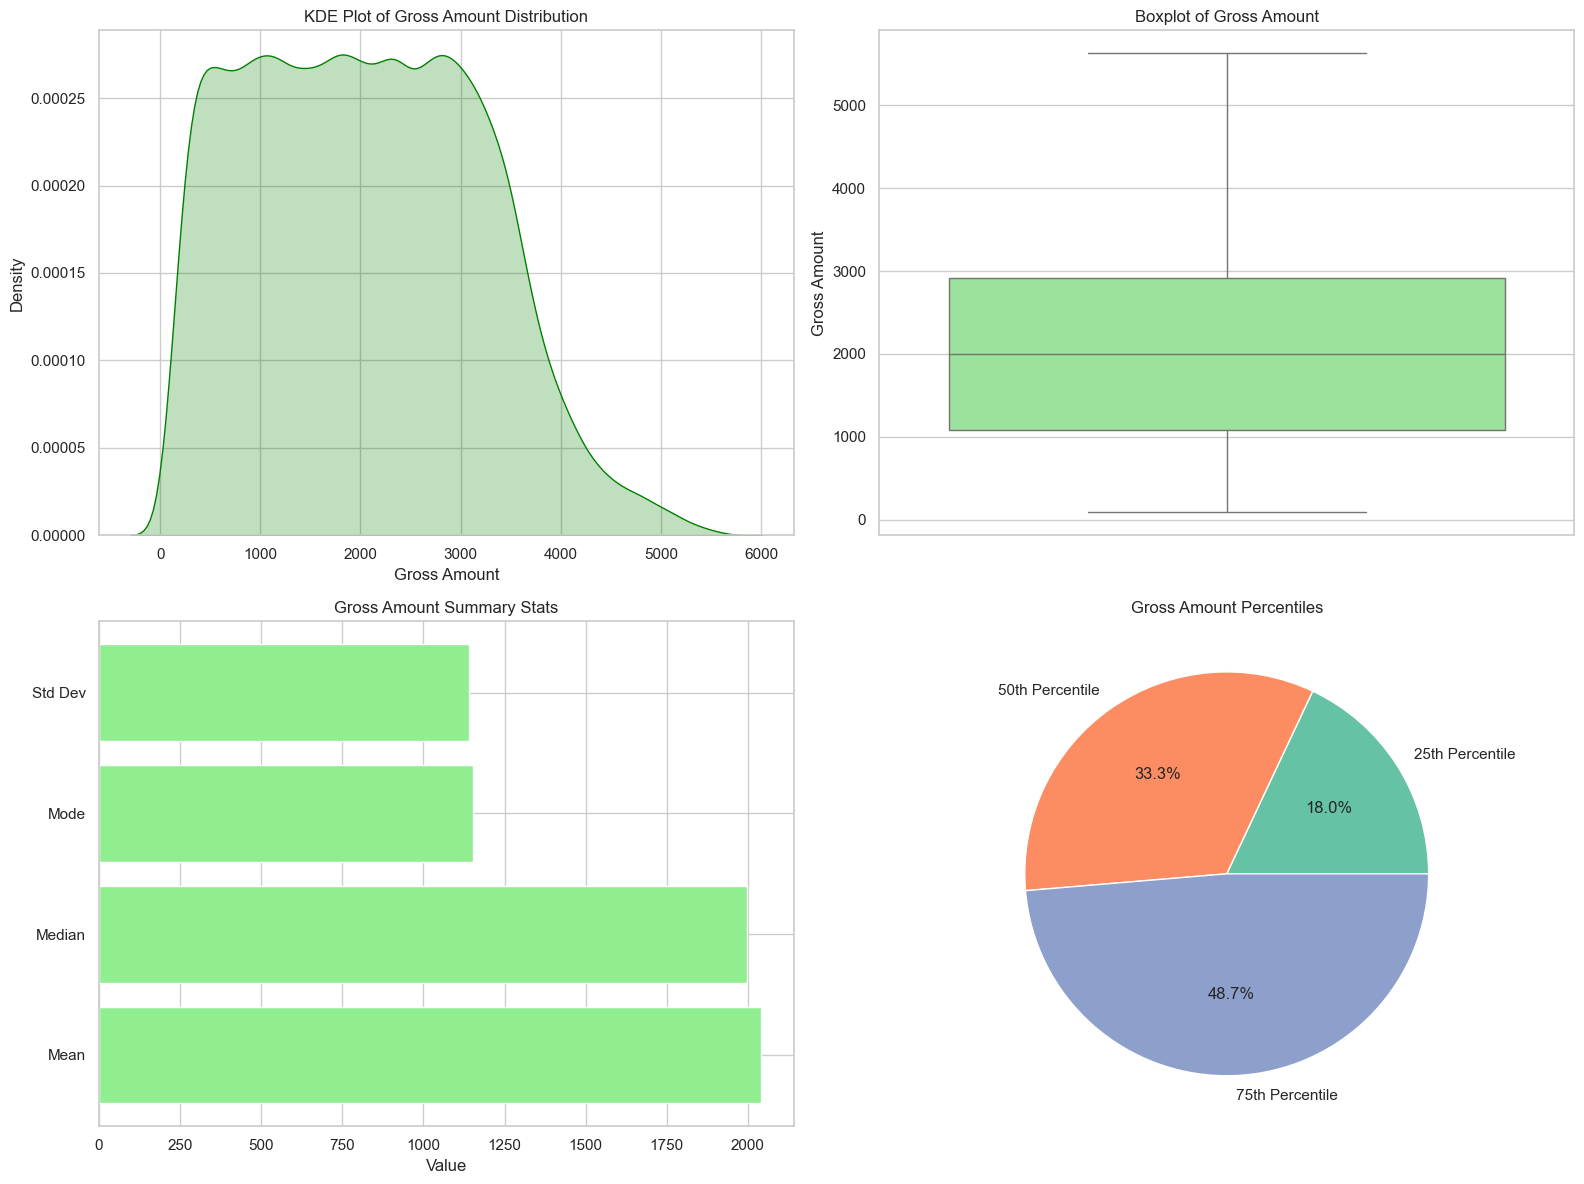

In [20]:
# Set up the plotting environment
plt.figure(figsize=(16, 12))

# 1. KDE Plot for Gross Amount Distribution
plt.subplot(2, 2, 1)
sns.kdeplot(data_cleaned['Gross Amount'], color='green', shade=True)
plt.title('KDE Plot of Gross Amount Distribution')
plt.xlabel('Gross Amount')
plt.ylabel('Density')

# 2. Box plot for Gross Amount
plt.subplot(2, 2, 2)
sns.boxplot(y=data_cleaned['Gross Amount'], color='lightgreen')
plt.title('Boxplot of Gross Amount')
plt.ylabel('Gross Amount')

# 3. Horizontal Bar Chart for Gross Amount Summary Stats
gross_stats = [mean_gross, median_gross, mode_gross, std_dev_gross]
stat_names = ['Mean', 'Median', 'Mode', 'Std Dev']

plt.subplot(2, 2, 3)
plt.barh(stat_names, gross_stats, color='lightgreen')
plt.title('Gross Amount Summary Stats')
plt.xlabel('Value')

# 4. Pie Chart for Gross Amount Percentiles
percentile_gross_labels = ['25th Percentile', '50th Percentile', '75th Percentile']
percentile_gross_values = percentile_gross_data

plt.subplot(2, 2, 4)
plt.pie(percentile_gross_values, labels=percentile_gross_labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Gross Amount Percentiles')

# Adjust layout for better spacing
plt.tight_layout()

# Show all the Gross Amount related graphs
plt.show()
